In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv


# EDA on movie dataset 

In [2]:
data = pd.read_csv("/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv")

In [3]:
data

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [6]:
# Check for missing values
data.isnull().sum()




MOVIES            0
YEAR            644
GENRE            80
RATING         1820
ONE-LINE          0
STARS             0
VOTES          1820
RunTime        2958
Gross          9539
text_length       0
dtype: int64

In [7]:
# Distribution of text lengths
data['text_length'] = data['ONE-LINE'].apply(len)
data['text_length'].describe()

count    9999.000000
mean      137.692569
std        65.777814
min         4.000000
25%       106.000000
50%       146.000000
75%       182.000000
max       438.000000
Name: text_length, dtype: float64

In [8]:
from collections import Counter

In [9]:
import nltk

In [10]:
nltk.download("punkt")

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [19]:
word_counts = Counter()
for text in data['ONE-LINE']:
    tokens = nltk.word_tokenize(text)
    word_counts.update(tokens)

# Most common words
word_counts.most_common(10)

[('the', 10084),
 ('a', 10011),
 ('to', 6913),
 ('and', 6907),
 ('of', 6073),
 ('in', 3841),
 ('his', 2693),
 ('is', 2251),
 ('with', 2223),
 ('her', 2169)]

In [18]:
# import pandas as pd
import string


# Create translation table for removing punctuation
translator = str.maketrans('', '', string.punctuation)

# Remove punctuation from the 'text' column
data['ONE-LINE'] = data['ONE-LINE'].apply(lambda x: x.translate(translator))
data['ONE-LINE'] = data['ONE-LINE'].str.replace('\n', '')





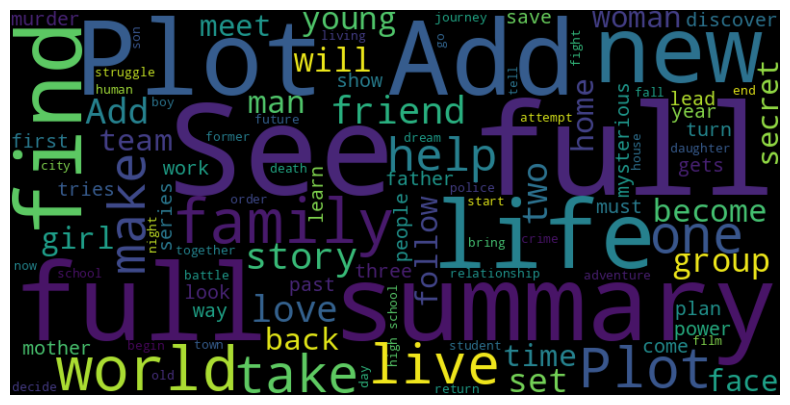

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud
text = ' '.join(data['ONE-LINE'])
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text
vectorizer = CountVectorizer(stop_words='english')
text_vectorized = vectorizer.fit_transform(data['ONE-LINE'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(text_vectorized)

# Display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)


Topic 0:
summary life group new series love young home world school
Topic 1:
world new summary lives young help father friends boy secret
Topic 2:
new life young man family summary mysterious woman town world
Topic 3:
summary new friends series old group love work school history
Topic 4:
summary new story world people events life takes special love
Topic 5:
new summary help catalina house makes world years people special
Topic 6:
summary family life man young new world home woman gets
Topic 7:
story friends life family summary school love world young high
Topic 8:
plot add new life world summary love story family series
Topic 9:
life new summary world friends lives gets family story girl
